In [140]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [113]:
df = pd.read_excel("CDR_6_MRIfull.xlsx")
df.head()

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,1,0,0,0,0,0,0,0,0,...,0.022229,0.002573,0.012313,0.001690,0.013390,0.002362,0.008422,0.001901,0.000727,0.001242
1,2,1,0,0,0,0,0,0,0,0,...,0.024551,0.002161,0.009114,0.001402,0.011982,0.001958,0.007428,0.001745,0.001002,0.001436
2,2,1,0,0,0,0,0,0,0,0,...,0.023044,0.002528,0.011245,0.001631,0.014259,0.002555,0.009018,0.001929,0.001011,0.001175
3,1,1,0,0,0,0,0,0,0,1,...,0.025236,0.001905,0.010176,0.001439,0.014644,0.001889,0.008720,0.001722,0.001107,0.001664
4,2,1,0,0,0,0,0,0,0,0,...,0.024523,0.001865,0.009781,0.001139,0.014733,0.001973,0.008312,0.001255,0.000858,0.001543


In [114]:
X = df.iloc[:,15:]
pca = PCA(2) 
projected = pca.fit_transform(X)
y = df["CDRGLOB"]

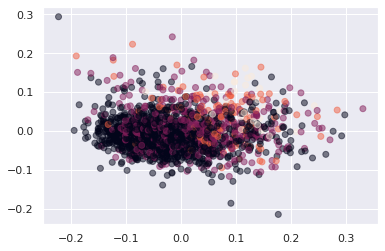

In [115]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5, c=y)

In [116]:
embedding = Isomap(n_components=2)
df2 = embedding.fit_transform(df.iloc[:,15:])

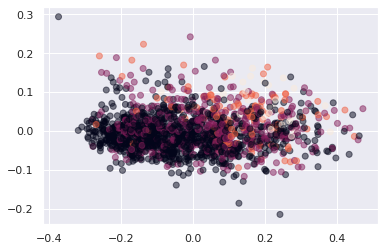

In [117]:
plt.scatter(df2[:, 0], projected[:, 1], alpha=0.5, c=y)

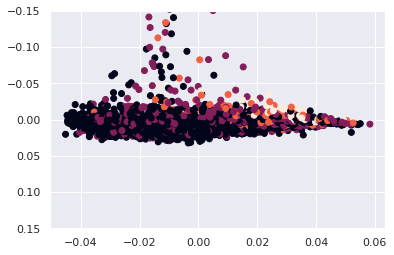

In [118]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1],c=y)
ax.set_ylim(0.15, -0.15);

In [119]:
X = df.iloc[:,15:]
pca = PCA() 
projected = pca.fit_transform(X)
y = df["CDRGLOB"]

In [120]:
embedding = Isomap(n_components=7)
df2 = embedding.fit_transform(df.iloc[:,15:])

In [121]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=7, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(X)

In [122]:
X1_train, X1_test, y1_train, y1_test = train_test_split(projected, df["CDRGLOB"], test_size=0.25, random_state=25, stratify=df["CDRGLOB"])

In [123]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
     df2, df["CDRGLOB"], test_size=0.25, random_state=25, stratify=df["CDRGLOB"])

In [124]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
     out, df["CDRGLOB"], test_size=0.25, random_state=25,stratify=df["CDRGLOB"])

In [125]:
clf = RandomForestClassifier(max_depth=2, random_state=25)
clf.fit(X1_train,y1_train)
pred1=clf.predict(X1_test)

clf2 = RandomForestClassifier(max_depth=2, random_state=25)
clf2.fit(X2_train,y2_train)
pred2=clf2.predict(X2_test)

clf3 = RandomForestClassifier(max_depth=2, random_state=25)
clf3.fit(X3_train,y3_train)
pred3=clf3.predict(X3_test)

In [126]:
print(classification_report(y1_test,pred1))
print(classification_report(y2_test,pred2))
print(classification_report(y3_test,pred3))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       252
           1       0.00      0.00      0.00       106
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        10

    accuracy                           0.63       400
   macro avg       0.16      0.25      0.19       400
weighted avg       0.40      0.63      0.49       400

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       252
           1       0.33      0.05      0.08       106
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        10

    accuracy                           0.64       400
   macro avg       0.25      0.26      0.22       400
weighted avg       0.50      0.64      0.51       400

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       252
           1       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [127]:

clf1 = GaussianNB()
clf1.fit(X1_train, y1_train)
clf1_predict = clf1.predict(X1_test)

clf2 = GaussianNB()
clf2.fit(X2_train, y2_train)
clf2_predict = clf2.predict(X2_test)

clf3 = GaussianNB()
clf3.fit(X3_train, y3_train)
clf3_predict = clf3.predict(X3_test)

print(classification_report(y1_test,clf1_predict))
print(classification_report(y2_test,clf2_predict))
print(classification_report(y3_test,clf3_predict))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       252
           1       0.39      0.39      0.39       106
           2       0.21      0.16      0.18        32
           3       0.38      0.30      0.33        10

    accuracy                           0.63       400
   macro avg       0.44      0.41      0.42       400
weighted avg       0.62      0.63      0.62       400

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       252
           1       0.38      0.14      0.21       106
           2       0.26      0.19      0.22        32
           3       0.25      0.30      0.27        10

    accuracy                           0.64       400
   macro avg       0.40      0.39      0.37       400
weighted avg       0.57      0.64      0.58       400

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       252
           1       0.

In [128]:

clf1 = SVC()
clf1.fit(X1_train, y1_train)
clf1_predict = clf1.predict(X1_test)

clf2 = SVC()
clf2.fit(X2_train, y2_train)
clf2_predict = clf2.predict(X2_test)

clf3 = SVC()
clf3.fit(X3_train, y3_train)
clf3_predict = clf3.predict(X3_test)

print(classification_report(y1_test,clf1_predict))
print(classification_report(y2_test,clf2_predict))
print(classification_report(y3_test,clf3_predict))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       252
           1       0.44      0.24      0.31       106
           2       0.17      0.03      0.05        32
           3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.33      0.30      0.29       400
weighted avg       0.58      0.66      0.60       400

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       252
           1       0.44      0.19      0.26       106
           2       0.20      0.03      0.05        32
           3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.33      0.29      0.28       400
weighted avg       0.57      0.66      0.58       400

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       252
           1       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [129]:
dfnew = pd.read_excel("CDR_6_MRI_selected.xlsx")
dfnew.head()

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674


In [130]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(dfnew.iloc[:,15:])


In [131]:
tsne = TSNE(n_components=3, init='random', random_state=25)
data_proj = tsne.fit_transform(data_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [132]:
embedding = Isomap(n_components=5)
df2 = embedding.fit_transform(data_scaled)

In [133]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=5, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(X)

In [134]:
X = data_scaled
pca = PCA(5) 
projected = pca.fit_transform(X)


In [135]:
last=np.concatenate((out,df2,projected,data_proj),axis=1)

In [136]:
X5_train, X5_test, y5_train, y5_test = train_test_split(last, dfnew["CDRGLOB"], test_size=0.25, random_state=25, stratify=dfnew["CDRGLOB"])

In [137]:
param_grid = {
   'C': [1, 10], 'kernel': ('linear', 'rbf')
}
grid_search = GridSearchCV(SVC(), param_grid, verbose=2)
grid_search.fit(X5_train, y5_train)

clf5 = grid_search.best_estimator_
clf5.fit(X5_train, y5_train)
clf5_predict = clf5.predict(X5_test)
print(classification_report(y5_test,clf5_predict))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................................C=1, kernel=linear; total time=   1.6s
[CV] END .................................C=1, kernel=linear; total time=   1.6s
[CV] END .................................C=1, kernel=linear; total time=   0.9s
[CV] END .................................C=1, kernel=linear; total time=   1.2s
[CV] END .................................C=1, kernel=linear; total time=   1.5s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ................................C=10, kernel=linear; total time=  12.3s
[CV] END ................................C=10, ke

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X5_train, y5_train)


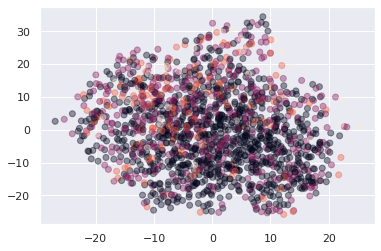

In [139]:
plt.scatter(data_proj[:,0], data_proj[:,1], c=dfnew["CDRGLOB"], alpha=0.4)

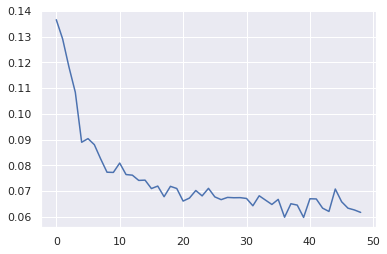

In [143]:
liste = []
for no_clusters in range(2,51):

    clusterer = KMeans(n_clusters=no_clusters, random_state=25)
    cluster_labels = clusterer.fit_predict(data_scaled)

    avg = silhouette_score(data_scaled, cluster_labels)
    liste.append(avg)
plt.plot(liste)

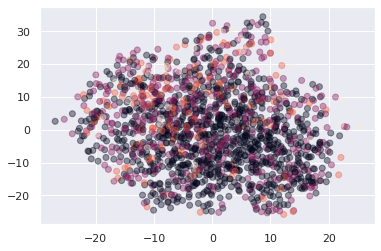

In [144]:
kmeans = KMeans(n_clusters=33, random_state=0).fit(X5_train, y5_train)
plt.scatter(data_proj[:,0], data_proj[:,1], c=dfnew["CDRGLOB"], alpha=0.4)

In [152]:
collumnss = dfnew[['SEX', 'INDEPEND', 'NPISCORE', 'FAQ']].to_numpy()

dflast = np.concatenate((last, collumnss), axis = 1)

X6_train, X6_test, y6_train, y6_test = train_test_split(dflast, df["CDRGLOB"], test_size=0.25, random_state=25,stratify = y)
param_grid = {
   'C': [1, 10], 'kernel': ('linear', 'rbf')
}
grid_search = GridSearchCV(SVC(), param_grid, verbose=2)
grid_search.fit(X6_train, y6_train)

clf6 = grid_search.best_estimator_
clf6.fit(X6_train, y6_train)
clf6_predict = clf6.predict(X6_test)
print(classification_report(y6_test,clf6_predict))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................................C=1, kernel=linear; total time=   0.7s
[CV] END .................................C=1, kernel=linear; total time=   1.6s
[CV] END .................................C=1, kernel=linear; total time=   0.5s
[CV] END .................................C=1, kernel=linear; total time=   3.6s
[CV] END .................................C=1, kernel=linear; total time=   0.7s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   3.2s
[CV] END ................................C=10, ke

In [153]:


X7_train, X7_test, y7_train, y7_test = train_test_split(collumnss, df["CDRGLOB"], test_size=0.25, random_state=25,stratify = y)
param_grid = {
   'C': [1, 10], 'kernel': ('linear', 'rbf')
}
grid_search = GridSearchCV(SVC(), param_grid, verbose=2)
grid_search.fit(X7_train, y7_train)

clf7 = grid_search.best_estimator_
clf7.fit(X7_train, y7_train)
clf7_predict = clf7.predict(X7_test)
print(classification_report(y7_test,clf7_predict))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.1s
[CV] END ................................C=10, ke